## LSTM을 이용해 로이터 뉴스 카테고리 분석하기

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2110848/2110848 [==============================] - 0s 0us/step


In [5]:
category = np.max(y_train)+1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [6]:
#단어 수 맞춰주기
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [7]:
#원-핫 인코딩 처리
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [11]:
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 46s 94ms/step - loss: 2.1534 - accuracy: 0.4459 - val_loss: 2.2306 - val_accuracy: 0.3736
Epoch 2/200
450/450 [==============================] - 42s 93ms/step - loss: 1.7590 - accuracy: 0.5376 - val_loss: 1.6877 - val_accuracy: 0.5650
Epoch 3/200
450/450 [==============================] - 47s 105ms/step - loss: 1.6363 - accuracy: 0.5788 - val_loss: 1.7433 - val_accuracy: 0.5485
Epoch 4/200
450/450 [==============================] - 47s 104ms/step - loss: 1.5539 - accuracy: 0.6057 - val_loss: 1.5527 - val_accuracy: 0.6167
Epoch 5/200
450/450 [==============================] - 47s 104ms/step - loss: 1.3797 - accuracy: 0.6444 - val_loss: 1.4139 - val_accuracy: 0.6313
Epoch 6/200
450/450 [==============================] - 47s 104ms/step - loss: 1.2534 - accuracy: 0.6830 - val_loss: 1.3143 - val_accuracy: 0.6683
Epoch 7/200
450/450 [==============================] - 50s 111ms/step - loss: 1.1528 - accuracy: 0.7065 - val_loss: 1.2734 - v

In [12]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 3s 39ms/step - loss: 1.2218 - accuracy: 0.7293

 Test Accuracy: 0.7293


In [13]:
y_vloss=history.history['val_loss']
y_loss=history.history['loss']

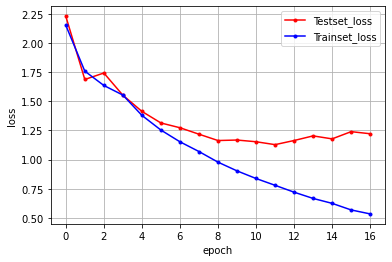

In [17]:
#그래프
x_len=np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()